# Interactive Notebook Tutorial

Welcome to Jupyter Notebook. The most popular IDE for Data Analysis in Python!

### Objective of this tutorial:

> **Help you get started with Jupyter Notebooks for Data Analysis and Python programming.**




## Jupyter Notebooks

This document that you're currently reading is a "Jupyter Notebook", and you've probably heard about it before. It's like a text document, but you can do many things on it:
- run code 
- display inline graphs
- pull data from databases 
- show excel spreadsheets and csv files!

Isn't it amazing? 😄 

**Interesting fact of the day:**

> _Jupyter is a nod to 3 languages: Julia, Python, and R._

This is a really quick tutorial on how to get started with Jupyter notebooks (and lab). It shouldn't take more than 10 minutes and you'll be writing Python code right away.

### Part 1: everything is a _cell_

Jupyter Notebooks are organized as a set of _"cells"_. Each cell can contain different types of content: like Python code (or R, Julia, etc), images or even human readable text (markdown), like the one you're currently reading.

We've left a couple of empty cells below for you to see them:

This is another cell containing Markdown (human readable) code or in simple words, **text**. And below, another empty cell:

You can edit these cells just by double clicking on them. Try editing the following cell:

**👉 Double click on me 👈**

When you double click the cell, it should open an `edit mode`.


If you see asterisks, it's because you've correctly entered "Edit Mode". Once you've made the changes, you have to "execute", or "run" the cell to reflect the changes. To do that just click on the little _play_ button on the top menu bar.

Jupyter notebooks are optimized for an efficient workflow. There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes; mastering these shortcuts will speed up your work. For example, there are two shortcuts to execute a cell:

1. `shift + return`: Run cell and advance to the next one.
2. `ctrl  + return`: Run the cell but don't change focus.


Try them with the following cell:

In [ ]:
2 + 2

You can try executing these cells as many times as you want, it won't break anything

#### `ctrl + Return` effect:

As you can see when running this, the code is correctly executed (it returns 4) and the focus (the blue line at the left side of the cell) stays in the same cell.


Now compare it to the next shortcut, `shift + return`:

#### `shift + Return` effect:


As you could see, every time we execute code the focus changes to the cell below.

## Part 2: Working with code

Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple `2 + 2` before, so let's do something a little bit more interesting. First, we need to import `numpy` and `matplotlib`:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Notebooks.ai include all the most popular Data Science and Deep Learning libraries already installed. And even if there's one missing, you can always install it in your own environment (more on that later). We've just imported these two libraries:
* `numpy` the most popular Python library for array manipulation and numeric computing
* `matplotlib` the most popular visualization library in the Python ecosystem.

Let's now execute a few lines of code and generate some plots:

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

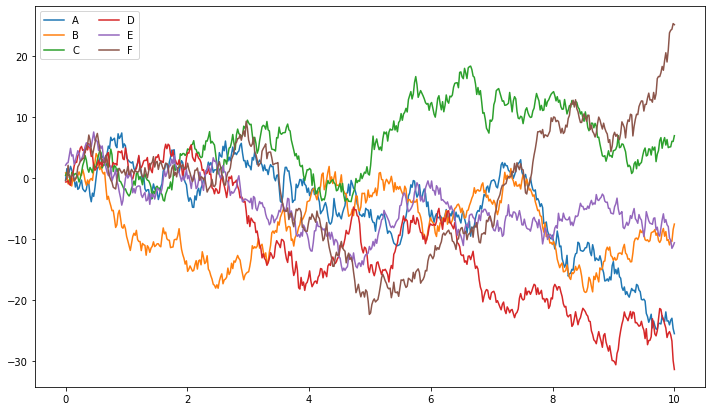

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

So what is this? Those are just random generated datapoints, but you can clearly see how simple is to do numeric processing and plotting inside Jupyter Notebooks!.


## Part 3: Interacting with data

Jupyter Notebook makes it really simple to interact with data in your local storage.

To show you the full potential of Jupyter Notebook, we're going to pull cryptocurrencies prices from a public API and store them as **csv** files, pretty fancy, right?. It looks quite complicated but **we will be able to do such things on our own at the end of this week!**

We need to import two libraries first: `requests` (to pull data from the web) and `pandas` to process it.

In [15]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from [Cryptowatch](https://cryptowat.ch) (for reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)).

In [16]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [17]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-05-30 09:35:08.044249')

In [18]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [19]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [20]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-05-30 10:00:00,35720.38,36040.52,35705.58,35876.85,73.675373,2.641804e+06
2021-05-30 11:00:00,35942.02,36027.67,35700.00,35733.61,77.479031,2.775850e+06
2021-05-30 12:00:00,35734.68,36439.96,35734.68,36397.21,191.720850,6.905766e+06
2021-05-30 13:00:00,36388.68,36516.99,35299.74,35550.20,144.196130,5.170613e+06
2021-05-30 14:00:00,35504.15,35834.01,35440.15,35713.66,60.951799,2.172177e+06


<AxesSubplot:xlabel='CloseTime'>

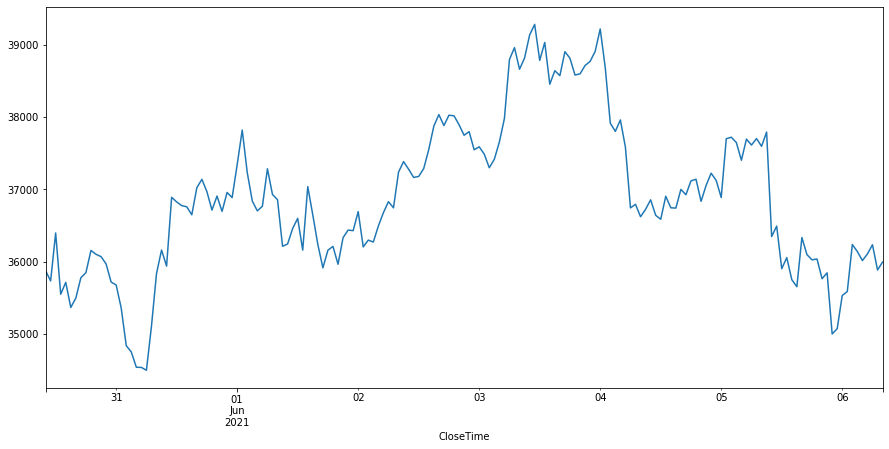

In [21]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [22]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-05-30 10:00:00,2422.03,2443.95,2409.56,2426.83,1976.633100,4.799935e+06
2021-05-30 11:00:00,2427.14,2434.54,2390.00,2400.21,1372.545919,3.315359e+06
2021-05-30 12:00:00,2400.31,2458.43,2392.41,2458.25,997.953217,2.417114e+06
2021-05-30 13:00:00,2465.00,2468.55,2367.67,2388.42,1456.415030,3.514487e+06
2021-05-30 14:00:00,2387.75,2406.62,2373.20,2390.53,626.731312,1.498933e+06


<AxesSubplot:xlabel='CloseTime'>

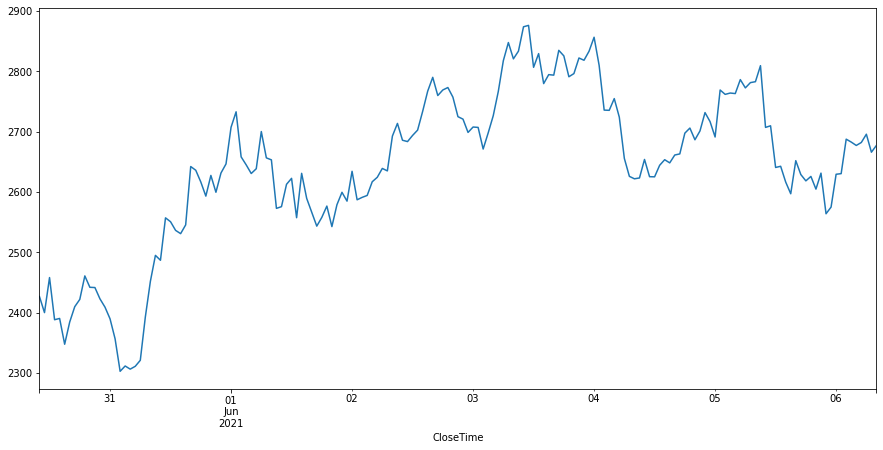

In [23]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Notebook.

## Part 4: Exporting to CSV

We're now ready to generate an Excel file from the downloaded prices. Working with CSV and other formats (like XML or JSON) is extremely simple in Python and Jupyter Notebook. `Pandas` library has pre-built methods to store data as CSV

We'll now write both our Bitcoin and Ether data to separate files:

In [25]:
btc.to_csv('bitcoin_price.csv', sep = ";")

In [ ]:
eth.to_csv('eth_price.csv', sep = ";")

## Final words

That's it! It's your time now to start learning and working inside the jupyter notebook.

To become a more proficient user, read and learn [Some neat Jupyter tricks](https://medium.com/swlh/some-neat-jupyter-tricks-be0775c3f17).